# 고객 세그먼트

## import & read_csv

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

In [ ]:
nnc = pd.read_csv('/content/new_no_cancel.csv')
nml = pd.read_csv('/content/new_member_list.csv')

## new_no_cancel 정리

In [ ]:
# 몇번째 경기인지 추가
game_date = list(nnc['date'].unique())
for i in range(len(nnc)):
    nnc.loc[i,'game_nth'] = game_date.index(nnc.loc[i,'date']) + 1

In [ ]:
nnc = nnc[['MB_IDX', 'date', 'special_seat_yn', 'discount_yn', 'before_reserve_yn', 'first_yn', 'game_nth']]

In [ ]:
nnc.head()

,MB_IDX,date,special_seat_yn,discount_yn,before_reserve_yn,first_yn,game_nth
0,3641,2022-02-19,0,0,9,1,1.0
1,101447,2022-02-19,0,0,9,1,1.0
2,101447,2022-02-19,0,0,9,1,1.0
3,102027,2022-02-19,0,0,9,1,1.0
4,102027,2022-02-19,0,0,9,1,1.0


In [ ]:
nnc.shape

(44132, 7)

In [ ]:
len(nnc['date'].unique())
# 총 경기 수는 19경기이다.

19

## 2022시즌 예매한 총 티켓 수

In [ ]:
# 2022시즌 예매한 총 티켓 수
trt = pd.DataFrame(nnc.groupby('MB_IDX').size()).reset_index().rename(columns={0:'total_reserve_ticket'})

In [ ]:
trt.head()

,MB_IDX,total_reserve_ticket
0,137,2
1,153,12
2,180,3
3,208,15
4,291,48


## 2022시즌 예매한 총 경기 수

In [ ]:
# 2022시즌 예매한 총 경기 수
trd = pd.DataFrame(nnc.groupby(['MB_IDX','date']).size()).reset_index()
trd = trd.groupby('MB_IDX').size().reset_index().rename(columns={0:'total_reserve_date'})

In [ ]:
trd.head()

,MB_IDX,total_reserve_date
0,137,1
1,153,11
2,180,2
3,208,15
4,291,15


## 2022시즌 예매한 총 경기 수 & 2022시즌 예매한 총 티켓 수 합치기

In [ ]:
print(trt.shape, trd.shape)

(7243, 2) (7243, 2)


In [ ]:
trdt = pd.merge(trd, trt, on='MB_IDX', how='inner')

In [ ]:
trdt.head()

,MB_IDX,total_reserve_date,total_reserve_ticket
0,137,1,2
1,153,11,12
2,180,2,3
3,208,15,15
4,291,15,48


In [ ]:
trdt.shape

(7243, 3)

## 멤버별 할인 받아 구매한 예매 건수 / 특성화석 예매 건수

In [ ]:
tta = pd.DataFrame(nnc.groupby(['MB_IDX']).sum()).reset_index()[['MB_IDX','discount_yn','special_seat_yn']]
tta = tta.rename(columns={'discount_yn':'total_ticket_discount',
                          'special_seat_yn':'total_special_seat'})

In [ ]:
tta.head()

,MB_IDX,total_ticket_discount,total_special_seat
0,137,0,2
1,153,4,0
2,180,3,0
3,208,10,0
4,291,21,0


In [ ]:
tta.shape

(7243, 3)

## tta와 trdt 머지

In [ ]:
df = pd.merge(tta, trdt, on='MB_IDX', how='inner')

## 비율 컬럼 추가

In [ ]:
df['rate_ticket_discount'] = df['total_ticket_discount'] / df['total_reserve_ticket']
df['rate_special_seat'] = df['total_special_seat'] / df['total_reserve_ticket']
df['mean_reserve_ticket'] = df['total_reserve_ticket'] / df['total_reserve_date']

In [ ]:
df.head()

,MB_IDX,total_ticket_discount,total_special_seat,total_reserve_date,total_reserve_ticket,rate_ticket_discount,rate_special_seat,mean_reserve_ticket
0,137,0,2,1,2,0.000000,1.0,2.000000
1,153,4,0,11,12,0.333333,0.0,1.090909
2,180,3,0,2,3,1.000000,0.0,1.500000
3,208,10,0,15,15,0.666667,0.0,1.000000
4,291,21,0,15,48,0.437500,0.0,3.200000


In [ ]:
# df['rate_weekend_date'] = df['total_weekend_date'] / df['total_reserve_date']
# df['rate_night_date'] = df['total_night_date'] / df['total_reserve_date']
# df['rate_final_date'] = df['total_final_date'] / df['total_reserve_date']

## new_member_list와 머지

In [ ]:
nml.head()

,MB_IDX,MB_AGE,age_group,region,job,favorite_idx
0,112,39,30,수도권,NaN,무고사
1,137,38,30,인천광역시,회사원(사무직/연구직),정혁
2,153,63,60,인천광역시,자영업자,김도혁
3,180,38,30,수도권,NaN,아길라르
4,208,29,20,인천광역시,교사,김도혁


In [ ]:
m1 = pd.merge(nml, df, on='MB_IDX', how='inner')

In [ ]:
m1.head()

,MB_IDX,MB_AGE,age_group,region,job,favorite_idx,total_ticket_discount,total_special_seat,total_reserve_date,total_reserve_ticket,rate_ticket_discount,rate_special_seat,mean_reserve_ticket
0,137,38,30,인천광역시,회사원(사무직/연구직),정혁,0,2,1,2,0.000000,1.0,2.000000
1,153,63,60,인천광역시,자영업자,김도혁,4,0,11,12,0.333333,0.0,1.090909
2,180,38,30,수도권,NaN,아길라르,3,0,2,3,1.000000,0.0,1.500000
3,208,29,20,인천광역시,교사,김도혁,10,0,15,15,0.666667,0.0,1.000000
4,291,30,30,인천광역시,회사원(사무직/연구직),김보섭,21,0,15,48,0.437500,0.0,3.200000


In [ ]:
m1.shape

(7243, 13)

## 정리

In [ ]:
for i in m1.columns:
    if type(m1.loc[0, i]) == np.float64:
        m1[i] = m1[i].apply(lambda x: round(x, 2))

In [ ]:
m1.head()

,MB_IDX,MB_AGE,age_group,region,job,favorite_idx,total_ticket_discount,total_special_seat,total_reserve_date,total_reserve_ticket,rate_ticket_discount,rate_special_seat,mean_reserve_ticket
0,137,38,30,인천광역시,회사원(사무직/연구직),정혁,0,2,1,2,0.00,1.0,2.00
1,153,63,60,인천광역시,자영업자,김도혁,4,0,11,12,0.33,0.0,1.09
2,180,38,30,수도권,NaN,아길라르,3,0,2,3,1.00,0.0,1.50
3,208,29,20,인천광역시,교사,김도혁,10,0,15,15,0.67,0.0,1.00
4,291,30,30,인천광역시,회사원(사무직/연구직),김보섭,21,0,15,48,0.44,0.0,3.20


## mean_game_nth_diff

In [ ]:
rdd = nnc.groupby(['MB_IDX','game_nth']).size().reset_index()

In [ ]:
rdd.head()

,MB_IDX,game_nth,0
0,137,9.0,2
1,153,1.0,1
2,153,2.0,1
3,153,3.0,1
4,153,4.0,1


In [ ]:
temp = rdd.groupby(['MB_IDX']).size().reset_index()

In [ ]:
temp.head()

,MB_IDX,0
0,137,1
1,153,11
2,180,2
3,208,15
4,291,15


In [ ]:
drop_list = list(temp[temp[0] == 1]['MB_IDX'])

In [ ]:
drop_index = []
for i in range(len(rdd)):
    if rdd.loc[i, 'MB_IDX'] in drop_list:
        drop_index.append(i)
rdd = rdd.drop(drop_index, axis=0)

In [ ]:
rdd = rdd.groupby(['MB_IDX','game_nth']).size().reset_index()

In [ ]:
rdd.head()

,MB_IDX,game_nth,0
0,153,1.0,1
1,153,2.0,1
2,153,3.0,1
3,153,4.0,1
4,153,6.0,1


In [ ]:
mb_list = list(rdd['MB_IDX'].unique())

In [ ]:
# mb_list에서 하나 가져오고
# 그거랑 매칭 되는 game_nth를 다 가져오고
# game_nth 한 쌍을 빼면서 diff_list를 생성 abs하고 평균
# mb_list랑 diff_list의 평균이랑 매칭

In [ ]:
mapping_list = []
for i in mb_list:
    temp = list(rdd[rdd['MB_IDX'] == i]['game_nth'])
    diff_list = []
    for j in range(len(temp)-1):
        diff_list.append(abs(temp[j] - temp[j+1]))
        if j+1 == len(temp):
            pass
    mapping_list.append(sum(diff_list) / len(diff_list))

In [ ]:
len(mapping_list)

3049

In [ ]:
len(mb_list)

3049

In [ ]:
mrdd = pd.DataFrame([mb_list, mapping_list]).T

In [ ]:
mrdd[0] = mrdd[0].astype(int)
mrdd[1] = mrdd[1].apply(lambda x: round(x, 2))

In [ ]:
mrdd = mrdd.rename(columns={0:'MB_IDX',
                            1:'mean_game_nth_diff'})

In [ ]:
mrdd.head()

,MB_IDX,mean_game_nth_diff
0,153,1.80
1,180,12.00
2,208,1.29
3,291,1.07
4,410,3.75


## df & mean_game_nth_diff > left join

In [ ]:
m2 = pd.merge(m1, mrdd, on='MB_IDX', how='left')

In [ ]:
m2['mean_game_nth_diff'] = m2['mean_game_nth_diff'].fillna(0)

## last_game_nth 추가

In [ ]:
lgn = nnc.groupby(['MB_IDX','date']).mean().reset_index()

In [ ]:
last_game_nth = list(lgn.drop_duplicates(['MB_IDX'], keep='last')['game_nth'])

In [ ]:
m2['last_game_nth'] = last_game_nth

In [ ]:
m2.head()

,MB_IDX,MB_AGE,age_group,region,job,favorite_idx,total_ticket_discount,total_special_seat,total_reserve_date,total_reserve_ticket,rate_ticket_discount,rate_special_seat,mean_reserve_ticket,mean_game_nth_diff,last_game_nth
0,137,38,30,인천광역시,회사원(사무직/연구직),정혁,0,2,1,2,0.00,1.0,2.00,0.00,9.0
1,153,63,60,인천광역시,자영업자,김도혁,4,0,11,12,0.33,0.0,1.09,1.80,19.0
2,180,38,30,수도권,NaN,아길라르,3,0,2,3,1.00,0.0,1.50,12.00,19.0
3,208,29,20,인천광역시,교사,김도혁,10,0,15,15,0.67,0.0,1.00,1.29,19.0
4,291,30,30,인천광역시,회사원(사무직/연구직),김보섭,21,0,15,48,0.44,0.0,3.20,1.07,19.0


In [ ]:
m2.shape

(7243, 15)

## clustering

In [ ]:
data = m2[['mean_game_nth_diff','total_reserve_ticket']]

In [ ]:
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ebd6605b0>,
                 estimator=KMeans(n_clusters=9), k=(1, 10))

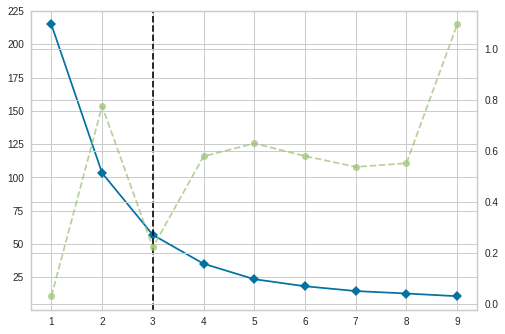

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(data_scale)

In [ ]:
m2['cluster'] = None

In [ ]:
k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
m2['cluster'] = model.fit_predict(data_scale)

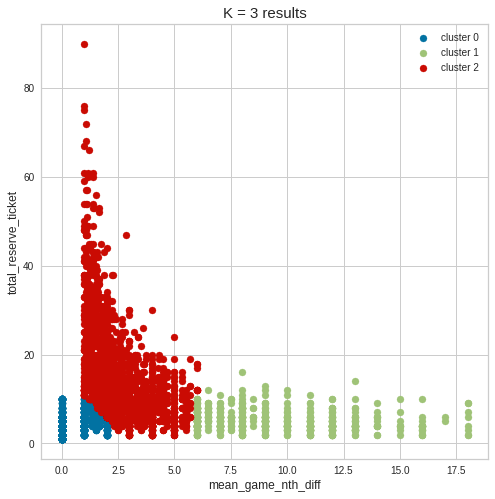

In [ ]:
plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(m2.loc[m2['cluster'] == i, 'mean_game_nth_diff'], m2.loc[m2['cluster'] == i, 'total_reserve_ticket'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('mean_game_nth_diff', size = 12)
plt.ylabel('total_reserve_ticket', size = 12)
plt.show()

In [ ]:
data = m2[m2['mean_game_nth_diff'] != 0][['mean_game_nth_diff','total_reserve_ticket']]

In [ ]:
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)

In [ ]:
m2['cluster'] = None

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f8eb88de250>,
                 estimator=KMeans(n_clusters=9), k=(1, 10))

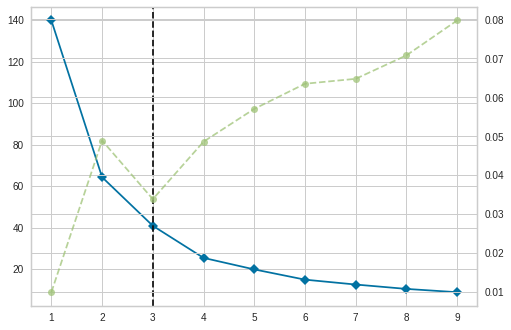

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(data_scale)

In [ ]:
m2['cluster'] = None

In [ ]:
k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
m2.loc[m2['mean_game_nth_diff'] != 0, 'cluster'] = model.fit_predict(data_scale)
m2.loc[m2['mean_game_nth_diff'] == 0, 'cluster'] = k

In [ ]:
m2['cluster'].value_counts()

3    4194
0    2166
2     448
1     435
Name: cluster, dtype: int64

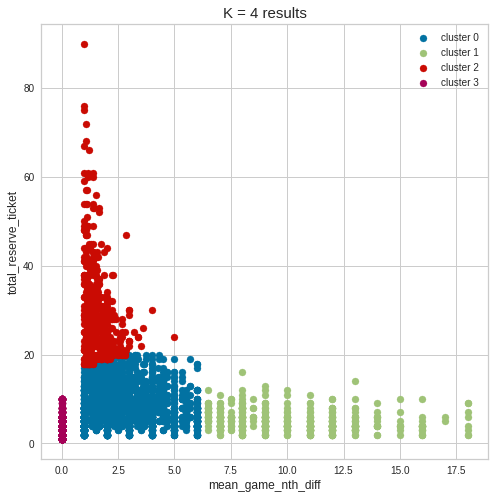

In [ ]:
plt.figure(figsize = (8, 8))

for i in range(k+1):
    plt.scatter(m2.loc[m2['cluster'] == i, 'mean_game_nth_diff'], m2.loc[m2['cluster'] == i, 'total_reserve_ticket'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title(f'K = {k+1} results' , size = 15)
plt.xlabel('mean_game_nth_diff', size = 12)
plt.ylabel('total_reserve_ticket', size = 12)
plt.show()

In [ ]:
m2['cluster'] = None

In [ ]:
k = 5

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
m2.loc[m2['mean_game_nth_diff'] != 0, 'cluster'] = model.fit_predict(data_scale)
m2.loc[m2['mean_game_nth_diff'] == 0, 'cluster'] = k

In [ ]:
m2['cluster'].value_counts()

5    4194
1    1326
0     707
3     595
2     264
4     157
Name: cluster, dtype: int64

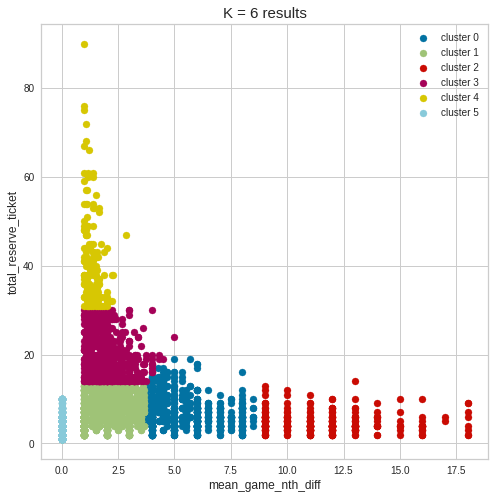

In [ ]:
plt.figure(figsize = (8, 8))

for i in range(k+1):
    plt.scatter(m2.loc[m2['cluster'] == i, 'mean_game_nth_diff'], m2.loc[m2['cluster'] == i, 'total_reserve_ticket'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title(f'K = {k+1} results', size = 15)
plt.xlabel('mean_game_nth_diff', size = 12)
plt.ylabel('total_reserve_ticket', size = 12)
plt.show()

In [ ]:
# 임의 배정

In [ ]:
m2['cluster'] = None

In [ ]:
m2.loc[m2['total_reserve_ticket'] <= 20, 'cluster'] = 3
m2.loc[(m2['total_reserve_ticket'] <= 20) & (m2['mean_game_nth_diff'] > 5), 'cluster'] = 2
m2.loc[(m2['total_reserve_ticket'] <= 20) & (m2['mean_game_nth_diff'] > 10), 'cluster'] = 1
m2.loc[m2['total_reserve_ticket'] > 20, 'cluster'] = 4
m2.loc[m2['total_reserve_ticket'] > 40, 'cluster'] = 5
m2.loc[m2['mean_game_nth_diff'] == 0, 'cluster'] = 0

In [ ]:
m2['cluster'].value_counts()

0    4194
3    2072
2     424
4     308
1     179
5      66
Name: cluster, dtype: int64

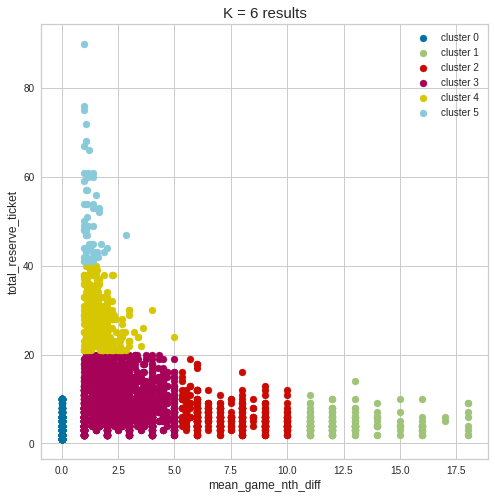

In [ ]:
plt.figure(figsize = (8, 8))

for i in range(k+1):
    plt.scatter(m2.loc[m2['cluster'] == i, 'mean_game_nth_diff'], m2.loc[m2['cluster'] == i, 'total_reserve_ticket'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title(f'K = {k+1} results', size = 15)
plt.xlabel('mean_game_nth_diff', size = 12)
plt.ylabel('total_reserve_ticket', size = 12)
plt.show()

In [ ]:
m2.head()

,MB_IDX,MB_AGE,age_group,region,job,favorite_idx,total_ticket_discount,total_special_seat,total_reserve_date,total_reserve_ticket,rate_ticket_discount,rate_special_seat,mean_reserve_ticket,mean_game_nth_diff,last_game_nth,cluster
0,137,38,30,인천광역시,회사원(사무직/연구직),정혁,0,2,1,2,0.00,1.0,2.00,0.00,9.0,0
1,153,63,60,인천광역시,자영업자,김도혁,4,0,11,12,0.33,0.0,1.09,1.80,19.0,3
2,180,38,30,수도권,NaN,아길라르,3,0,2,3,1.00,0.0,1.50,12.00,19.0,1
3,208,29,20,인천광역시,교사,김도혁,10,0,15,15,0.67,0.0,1.00,1.29,19.0,3
4,291,30,30,인천광역시,회사원(사무직/연구직),김보섭,21,0,15,48,0.44,0.0,3.20,1.07,19.0,5


In [ ]:
m2.shape

(7243, 16)

In [ ]:
m2.to_csv('segment.csv', index=False)